In [14]:
import pandas as pd
pd.options.display.max_columns = None

import numpy as np 
from datetime import datetime
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
ALL_MACRO_DATA = pd.read_excel('全部宏观指标.xlsx', index_col = 0)
ALL_MACRO_DATA_DICT = pd.read_excel('全部宏观指标.xlsx', sheet_name = 1, index_col = 0).T
ALL_MACRO_DATA[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['频率']  == '日'].index] = ALL_MACRO_DATA[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['频率']  == '日'].index].fillna(method='ffill')
ALL_MACRO_DATA.index = ALL_MACRO_DATA.index.to_period("M")
df_grouped = ALL_MACRO_DATA.groupby(ALL_MACRO_DATA.index)
ALL_MACRO_DATA_M = df_grouped.tail(1)
ALL_MACRO_DATA_M.index  = pd.to_datetime(ALL_MACRO_DATA_M.index.end_time.date )
ALL_MACRO_DATA_M

,工业增加值:当月同比,CPI:当月同比,RPI:当月同比,PPI:全部工业品:当月同比,进出口金额:当月值,实际使用外资金额:外商直接投资:当月值,固定资产投资完成额:累计值,房地产开发投资完成额:累计值,社会消费品零售总额:累计值,M2,金融机构:各项贷款余额,金融机构:各项存款余额,货币当局:总资产,官方储备资产:外汇储备,银行间同业拆借:加权平均利率:当月值,社会融资规模:当月值,社会融资规模:新增人民币贷款:当月值,人民币:实际有效汇率指数,即期汇率:美元兑人民币,中债国债到期收益率:1年,中债国债到期收益率:10年,中债国开债到期收益率:1年,中债国开债到期收益率:10年,银行间同业拆借加权利率:1天,银行间同业拆借加权利率:3个月,沪深300指数,沪深股市:股票总市值(A、B股),沪深股市:股票成交金额:当月值,沪深股市:筹资金额:境内外合计:当月值,债券发行量:合计:当月值,公共财政收入:累计值,公共财政支出:累计值,PMI,PMI:生产,PMI:新订单,PMI:新出口订单,PMI:在手订单,PMI:产成品库存,PMI:采购量,PMI:进口,PMI:主要原材料购进价格,PMI:原材料库存,PMI:从业人员,PMI:供货商配送时间,非制造业PMI:商务活动,非制造业PMI:新订单,非制造业PMI:新出口订单,非制造业PMI:业务活动预期,非制造业PMI:投入品价格,非制造业PMI:销售价格,非制造业PMI:从业人员,非制造业PMI:在手订单,非制造业PMI:存货,非制造业PMI:供应商配送时间,非官方中国PMI,非官方中国服务业PMI:经营活动指数,消费者信心指数(月),消费者预期指数(月),产量:原煤:累计值,进口数量:原油:当月值,产量:铁矿石原矿量:累计值,进口数量:铁矿石:合计:当月值,土地购置费:累计值,房屋施工面积:累计值,房屋竣工面积:累计值,商品房销售面积:累计值,产量:乘用车:广义:当月值,零售销量:乘用车:广义:当月值
1991-01-31,23.5,2.2,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.25,163.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.5,110.2,8302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,9.2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354.77,311.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,111.9,14721.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,10.9,1.6,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,585.81,516.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.8,112.9,23347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,10.9,1.3,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.84,745.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.9,113.2,32405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,10.9,3.6,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1046.53,984.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.4,112.7,41809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,5.0,2.1,2.3,-1.3,5113.40,130.4,471459.0,113945.30,360575.1,2612914.57,2113733.70,2548210.07,398871.25,30524.27,1.4073,9134.0,4431.0,99.39,7.2985,1.7305,2.6433,1.8588,2.7700,1.8060,2.3385,3508.7034,740288.85,127023.45,3849.48,21638.0419,173397.00,206334.00,49.2,49.6,48.1,47.6,43.9,48.0,49.3,47.9,53.3,47.7,48.3,47.1,48.7,42.8,45.0,57.9,51.0,48.1,46.1,43.1,45.7,48.3,49.2,48.4,86.8,86.3,368539.7,4314.0,80986.6,9489.505594,36653.1651,888893.80,46564.58,111179.29,2315675.0,1866180.0
2022-11-30,2.2,1.6,1.8,-1.3,5213.47,97.4,520043.0,123863.00,399190.0,2647008.48,2125869.63,2577756.26,401527.62,31174.88,1.5514,19837.0,11448.0,96.84,7.1419,2.1341,2.8850,2.3104,3.0103,1.6641,2.7292,3853.0365,800975.95,204202.09,4194.45,18322.4383,185518.00,227255.00,48.0,47.8,46.4,46.7,43.4,48.1,47.1,47.1,50.7,46.7,47.4,46.7,46.7,42.3,46.1,54.1,49.9,48.7,45.5,43.2,45.6,45.0,49.4,46.7,85.5,84.2,409407.9,4674.0,88904.6,9883.512643,39551.5768,896856.56,55708.82,121250.08,2136171.0,1673515.0
2022-12-31,1.3,1.8,2.0,-0.7,5341.45,110.5,572138.0,132895.41,439733.0,2664320.84,2139852.67,2584998.23,416783.78,31276.91,1.2559,13058.0,14401.0,97.40,6.9514,2.0969,2.8353,2.2317,2.9907,2.0460,2.5000,3871.6338,788005.91,173256.09,4294.21,20023.3006,203703.00,260609.00,47.0,44.6,43.9,44.2,43.1,46.6,44.9,43.7,51.6,47.1,44.8,40.1,41.6,39.1,44.5,53.7,49.2,47.5,42.9,43.0,45.4,40.4,49.0,48.0,88.

In [3]:
ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '当月同比'].index] =  np.log(1 + ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '当月同比'].index ] / 100)

grouped = ALL_MACRO_DATA_M.fillna(0).groupby(pd.to_datetime(ALL_MACRO_DATA_M.index).year)
ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '累计值'].index] = grouped[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '累计值'].index].apply(lambda x: x.diff())
for i in ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据缺失月份'] == 1].index].columns:
    for j in ALL_MACRO_DATA_M.index:
        if (j.month == 1) & pd.isnull(ALL_MACRO_DATA_M.loc[j,i]) & (pd.to_datetime(datetime(j.year, (j + pd.DateOffset(days=1)).month, (j + pd.DateOffset(days=1)).daysinmonth)) in ALL_MACRO_DATA_M.index):
            ALL_MACRO_DATA_M.loc[j,i] = ALL_MACRO_DATA_M.loc[pd.to_datetime(datetime(j.year, (j + pd.DateOffset(days=1)).month, (j + pd.DateOffset(days=1)).daysinmonth)),i] / 2

ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '累计值'].index] = np.log(ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '累计值'].index]  / ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '累计值'].index].shift(12))

ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '当月值'].index] = np.log(ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '当月值'].index]  / ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '当月值'].index].shift(12))

ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '当日值'].index] = np.log(ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '当日值'].index]  / ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据类型'] == '当日值'].index].shift(12))
    
ALL_MACRO_DATA_M[np.isinf(ALL_MACRO_DATA_M)] = np.nan

ALL_MACRO_DATA_M = ALL_MACRO_DATA_M['2009':]

ALL_MACRO_DATA_M.iloc[:-3] = ALL_MACRO_DATA_M.iloc[:-3].fillna(0)

In [91]:
ALL_MACRO_DATA_M

,工业增加值:当月同比,CPI:当月同比,RPI:当月同比,PPI:全部工业品:当月同比,进出口金额:当月值,实际使用外资金额:外商直接投资:当月值,固定资产投资完成额:累计值,房地产开发投资完成额:累计值,社会消费品零售总额:累计值,M2,金融机构:各项贷款余额,金融机构:各项存款余额,货币当局:总资产,官方储备资产:外汇储备,银行间同业拆借:加权平均利率:当月值,社会融资规模:当月值,社会融资规模:新增人民币贷款:当月值,人民币:实际有效汇率指数,即期汇率:美元兑人民币,中债国债到期收益率:1年,中债国债到期收益率:10年,中债国开债到期收益率:1年,中债国开债到期收益率:10年,银行间同业拆借加权利率:1天,银行间同业拆借加权利率:3个月,沪深300指数,沪深股市:股票总市值(A、B股),沪深股市:股票成交金额:当月值,沪深股市:筹资金额:境内外合计:当月值,债券发行量:合计:当月值,公共财政收入:累计值,公共财政支出:累计值,PMI,PMI:生产,PMI:新订单,PMI:新出口订单,PMI:在手订单,PMI:产成品库存,PMI:采购量,PMI:进口,PMI:主要原材料购进价格,PMI:原材料库存,PMI:从业人员,PMI:供货商配送时间,非制造业PMI:商务活动,非制造业PMI:新订单,非制造业PMI:新出口订单,非制造业PMI:业务活动预期,非制造业PMI:投入品价格,非制造业PMI:销售价格,非制造业PMI:从业人员,非制造业PMI:在手订单,非制造业PMI:存货,非制造业PMI:供应商配送时间,非官方中国PMI,非官方中国服务业PMI:经营活动指数,消费者信心指数(月),消费者预期指数(月),产量:原煤:累计值,进口数量:原油:当月值,产量:铁矿石原矿量:累计值,进口数量:铁矿石:合计:当月值,土地购置费:累计值,房屋施工面积:累计值,房屋竣工面积:累计值,商品房销售面积:累计值,产量:乘用车:广义:当月值,零售销量:乘用车:广义:当月值,YOY
2009-01-31,-0.029738,0.009950,0.006976,-0.034074,-0.343678,-0.395566,0.235302,0.010239,0.109746,0.171735,0.170783,0.206981,0.177052,0.185297,-0.946928,0.253349,0.696925,0.131630,-0.048879,-1.147852,-0.322779,-1.149108,-0.376031,-0.737750,-1.232144,-0.821125,-0.736032,-1.137621,-1.891125,-1.248131,-0.012222,0.350771,-0.156985,-0.209423,-0.204300,-0.374322,-0.214947,-0.106739,-0.250311,-0.251314,-0.489393,-0.113979,-0.144805,0.017947,-0.114259,-0.112689,-0.198494,-0.228402,-0.257829,-0.147678,-0.045985,-0.002356,-0.080552,-0.007722,-0.231638,0.000000,-0.096835,-0.126514,0.145144,-0.083756,0.089149,-0.119736,-0.302984,0.132708,0.254331,-0.002515,-0.156080,0.019635,0.062035
2009-02-28,0.104360,-0.016129,-0.016129,-0.045730,-0.287338,-0.172328,0.235302,0.010239,0.109746,0.185212,0.194611,0.207093,0.163149,0.149148,-1.113822,0.855597,1.482109,0.128086,-0.038999,-1.185118,-0.270209,-1.171608,-0.312693,-1.113542,-1.205588,-0.781099,-0.696186,0.648756,-1.612962,-0.779877,-0.012222,0.350771,-0.085990,-0.078840,-0.121304,-0.167231,-0.141138,0.008421,-0.098061,-0.193030,-0.410470,0.011025,-0.077202,0.098238,-0.073460,-0.071865,-0.112342,-0.217611,-0.258450,-0.122029,-0.049914,-0.002301,-0.032157,0.048494,-0.157629,0.000000,-0.085360,-0.109855,0.145144,-0.197410,0.089149,0.203527,-0.302984,0.132708,0.254331,-0.002515,0.216663,0.284016,0.062035
2009-03-31,0.079735,-0.012073,-0.015114,-0.061875,-0.234313,-0.100350,0.264765,0.070130,0.137181,0.226558,0.239889,0.228905,0.145894,0.149657,-0.989718,1.236652,1.898530,0.152006,-0.025874,-1.167568,-0.246777,-1.290267,-0.245126,-1.040974,-1.115984,-0.413104,-0.339675,0.274759,-1.350270,-0.590506,-0.003116,0.273336,-0.108409,-0.119149,-0.155719,-0.218501,-0.112304,-0.012766,-0.169899,-0.164055,-0.434709,-0.067167,-0.094187,0.015717,-0.079477,-0.080192,-0.236980,-0.144200,-0.299004,-0.113555,-0.061440,-0.029922,-0.027457,-0.024599,-0.194156,0.000000,-0.095038,-0.122486,0.093396,-0.057090,-0.081100,0.378131,-0.134939,0.068899,0.206662,0.152188,0.053496,0.201464,0.062035
2009-04-30,0.070458,-0.015114,-0.019183,-0.068279,-0.258847,-0.254553,0.292337,0.062219,0.137613,0.230272,0.239766,0.232754,0.124413,0.134166,-1.102481,-0.260726,0.232566,0.123533,-0.024485,-1.170333,-0.270535,-1.177844,-0.262570,-0.982953,-0.970645,-0.411731,-0.350260,0.530797,-0.255036,-0.061867,-0.146106,0.219213,-0.101240,-0.147158,-0.138378,-0.181982,-0.088033,-0.052186,-0.139298,-0.115113,-0.381130,-0.087722,-0.050398,-0.007874,-0.087634,-0.080658,-0.182322,-0.088069,-0.226169,-0.081475,-0.075691,0.009281,-0.036368,-0.007648,-0.100559,0.000000,-0.087592,-0.111067,0.061109,0.127103,-0.092980,0.285523,-0.217613,0.095008,0.258415,0.329261,0.228650,0.370570,0.078811
2009-05-31,0.085260,-0.014099,-0.019183,-0.074724,-0.298244,-0.195971,0.326921,0.078642,0.141696,0.228606,0.247030,0.236425,0.122857,0.150824,-1.202796,0.968714,0.739018,0.087056,-0.016299,-1.251945,-0.313097,-1.159370,-0.279122,-1.244734,-1.183105,-0.268950,-0.223737,0.229698,-0.579881,0.241258,0.046952,0.135363,-0.003759,0.021315,0.014337,-0.063790,-0.010194,-0.052699,0.038361,-0.018055,-0.330536,-0.042469,-0.025719,0.028285,-0.044531,-0.0208

In [55]:
GDP_YOY = pd.read_csv('GDP_YOY.csv').set_index('QTR')
GDP_YOY= np.log(GDP_YOY /100 +1)
GDP_YOY.index = pd.to_datetime(GDP_YOY.index)
GDP_YOY.index = GDP_YOY.index + pd.offsets.MonthEnd(0)
ALL_MACRO_DATA_M = pd.concat([ALL_MACRO_DATA_M,GDP_YOY], axis = 1)['2009':]
ALL_MACRO_DATA_M['YOY']  = ALL_MACRO_DATA_M['YOY'].fillna(method='bfill')
ALL_MACRO_DATA_M 

,工业增加值:当月同比,CPI:当月同比,RPI:当月同比,PPI:全部工业品:当月同比,进出口金额:当月值,实际使用外资金额:外商直接投资:当月值,固定资产投资完成额:累计值,房地产开发投资完成额:累计值,社会消费品零售总额:累计值,M2,金融机构:各项贷款余额,金融机构:各项存款余额,货币当局:总资产,官方储备资产:外汇储备,银行间同业拆借:加权平均利率:当月值,社会融资规模:当月值,社会融资规模:新增人民币贷款:当月值,人民币:实际有效汇率指数,即期汇率:美元兑人民币,中债国债到期收益率:1年,中债国债到期收益率:10年,中债国开债到期收益率:1年,中债国开债到期收益率:10年,银行间同业拆借加权利率:1天,银行间同业拆借加权利率:3个月,沪深300指数,沪深股市:股票总市值(A、B股),沪深股市:股票成交金额:当月值,沪深股市:筹资金额:境内外合计:当月值,债券发行量:合计:当月值,公共财政收入:累计值,公共财政支出:累计值,PMI,PMI:生产,PMI:新订单,PMI:新出口订单,PMI:在手订单,PMI:产成品库存,PMI:采购量,PMI:进口,PMI:主要原材料购进价格,PMI:原材料库存,PMI:从业人员,PMI:供货商配送时间,非制造业PMI:商务活动,非制造业PMI:新订单,非制造业PMI:新出口订单,非制造业PMI:业务活动预期,非制造业PMI:投入品价格,非制造业PMI:销售价格,非制造业PMI:从业人员,非制造业PMI:在手订单,非制造业PMI:存货,非制造业PMI:供应商配送时间,非官方中国PMI,非官方中国服务业PMI:经营活动指数,消费者信心指数(月),消费者预期指数(月),产量:原煤:累计值,进口数量:原油:当月值,产量:铁矿石原矿量:累计值,进口数量:铁矿石:合计:当月值,土地购置费:累计值,房屋施工面积:累计值,房屋竣工面积:累计值,商品房销售面积:累计值,产量:乘用车:广义:当月值,零售销量:乘用车:广义:当月值,YOY
2009-01-31,-0.029738,0.009950,0.006976,-0.034074,-0.343678,-0.395566,0.235302,0.010239,0.109746,0.171735,0.170783,0.206981,0.177052,0.185297,-0.946928,0.253349,0.696925,0.131630,-0.048879,-1.147852,-0.322779,-1.149108,-0.376031,-0.737750,-1.232144,-0.821125,-0.736032,-1.137621,-1.891125,-1.248131,-0.012222,0.350771,-0.156985,-0.209423,-0.204300,-0.374322,-0.214947,-0.106739,-0.250311,-0.251314,-0.489393,-0.113979,-0.144805,0.017947,-0.114259,-0.112689,-0.198494,-0.228402,-0.257829,-0.147678,-0.045985,-0.002356,-0.080552,-0.007722,-0.231638,0.000000,-0.096835,-0.126514,0.145144,-0.083756,0.089149,-0.119736,-0.302984,0.132708,0.254331,-0.002515,-0.156080,0.019635,0.062035
2009-02-28,0.104360,-0.016129,-0.016129,-0.045730,-0.287338,-0.172328,0.235302,0.010239,0.109746,0.185212,0.194611,0.207093,0.163149,0.149148,-1.113822,0.855597,1.482109,0.128086,-0.038999,-1.185118,-0.270209,-1.171608,-0.312693,-1.113542,-1.205588,-0.781099,-0.696186,0.648756,-1.612962,-0.779877,-0.012222,0.350771,-0.085990,-0.078840,-0.121304,-0.167231,-0.141138,0.008421,-0.098061,-0.193030,-0.410470,0.011025,-0.077202,0.098238,-0.073460,-0.071865,-0.112342,-0.217611,-0.258450,-0.122029,-0.049914,-0.002301,-0.032157,0.048494,-0.157629,0.000000,-0.085360,-0.109855,0.145144,-0.197410,0.089149,0.203527,-0.302984,0.132708,0.254331,-0.002515,0.216663,0.284016,0.062035
2009-03-31,0.079735,-0.012073,-0.015114,-0.061875,-0.234313,-0.100350,0.264765,0.070130,0.137181,0.226558,0.239889,0.228905,0.145894,0.149657,-0.989718,1.236652,1.898530,0.152006,-0.025874,-1.167568,-0.246777,-1.290267,-0.245126,-1.040974,-1.115984,-0.413104,-0.339675,0.274759,-1.350270,-0.590506,-0.003116,0.273336,-0.108409,-0.119149,-0.155719,-0.218501,-0.112304,-0.012766,-0.169899,-0.164055,-0.434709,-0.067167,-0.094187,0.015717,-0.079477,-0.080192,-0.236980,-0.144200,-0.299004,-0.113555,-0.061440,-0.029922,-0.027457,-0.024599,-0.194156,0.000000,-0.095038,-0.122486,0.093396,-0.057090,-0.081100,0.378131,-0.134939,0.068899,0.206662,0.152188,0.053496,0.201464,0.062035
2009-04-30,0.070458,-0.015114,-0.019183,-0.068279,-0.258847,-0.254553,0.292337,0.062219,0.137613,0.230272,0.239766,0.232754,0.124413,0.134166,-1.102481,-0.260726,0.232566,0.123533,-0.024485,-1.170333,-0.270535,-1.177844,-0.262570,-0.982953,-0.970645,-0.411731,-0.350260,0.530797,-0.255036,-0.061867,-0.146106,0.219213,-0.101240,-0.147158,-0.138378,-0.181982,-0.088033,-0.052186,-0.139298,-0.115113,-0.381130,-0.087722,-0.050398,-0.007874,-0.087634,-0.080658,-0.182322,-0.088069,-0.226169,-0.081475,-0.075691,0.009281,-0.036368,-0.007648,-0.100559,0.000000,-0.087592,-0.111067,0.061109,0.127103,-0.092980,0.285523,-0.217613,0.095008,0.258415,0.329261,0.228650,0.370570,0.078811
2009-05-31,0.085260,-0.014099,-0.019183,-0.074724,-0.298244,-0.195971,0.326921,0.078642,0.141696,0.228606,0.247030,0.236425,0.122857,0.150824,-1.202796,0.968714,0.739018,0.087056,-0.016299,-1.251945,-0.313097,-1.159370,-0.279122,-1.244734,-1.183105,-0.268950,-0.223737,0.229698,-0.579881,0.241258,0.046952,0.135363,-0.003759,0.021315,0.014337,-0.063790,-0.010194,-0.052699,0.038361,-0.018055,-0.330536,-0.042469,-0.025719,0.028285,-0.044531,-0.0208

In [85]:
ALL_MACRO_DATA_M_NORM = (ALL_MACRO_DATA_M - ALL_MACRO_DATA_M.mean()) / ALL_MACRO_DATA_M.std()
#ALL_MACRO_DATA_M_NORM * ALL_MACRO_DATA_M.std() + ALL_MACRO_DATA_M.mean()

In [93]:
ALL_MACRO_DATA_M_NORM * ALL_MACRO_DATA_M.std() + ALL_MACRO_DATA_M.mean()

,工业增加值:当月同比,CPI:当月同比,RPI:当月同比,PPI:全部工业品:当月同比,进出口金额:当月值,实际使用外资金额:外商直接投资:当月值,固定资产投资完成额:累计值,房地产开发投资完成额:累计值,社会消费品零售总额:累计值,M2,金融机构:各项贷款余额,金融机构:各项存款余额,货币当局:总资产,官方储备资产:外汇储备,银行间同业拆借:加权平均利率:当月值,社会融资规模:当月值,社会融资规模:新增人民币贷款:当月值,人民币:实际有效汇率指数,即期汇率:美元兑人民币,中债国债到期收益率:1年,中债国债到期收益率:10年,中债国开债到期收益率:1年,中债国开债到期收益率:10年,银行间同业拆借加权利率:1天,银行间同业拆借加权利率:3个月,沪深300指数,沪深股市:股票总市值(A、B股),沪深股市:股票成交金额:当月值,沪深股市:筹资金额:境内外合计:当月值,债券发行量:合计:当月值,公共财政收入:累计值,公共财政支出:累计值,PMI,PMI:生产,PMI:新订单,PMI:新出口订单,PMI:在手订单,PMI:产成品库存,PMI:采购量,PMI:进口,PMI:主要原材料购进价格,PMI:原材料库存,PMI:从业人员,PMI:供货商配送时间,非制造业PMI:商务活动,非制造业PMI:新订单,非制造业PMI:新出口订单,非制造业PMI:业务活动预期,非制造业PMI:投入品价格,非制造业PMI:销售价格,非制造业PMI:从业人员,非制造业PMI:在手订单,非制造业PMI:存货,非制造业PMI:供应商配送时间,非官方中国PMI,非官方中国服务业PMI:经营活动指数,消费者信心指数(月),消费者预期指数(月),产量:原煤:累计值,进口数量:原油:当月值,产量:铁矿石原矿量:累计值,进口数量:铁矿石:合计:当月值,土地购置费:累计值,房屋施工面积:累计值,房屋竣工面积:累计值,商品房销售面积:累计值,产量:乘用车:广义:当月值,零售销量:乘用车:广义:当月值,YOY
2009-01-31,-0.029738,0.009950,0.006976,-0.034074,-0.343678,-0.395566,0.235302,0.010239,0.109746,0.171735,0.170783,0.206981,0.177052,0.185297,-0.946928,0.253349,0.696925,0.131630,-0.048879,-1.147852,-0.322779,-1.149108,-0.376031,-0.737750,-1.232144,-0.821125,-0.736032,-1.137621,-1.891125,-1.248131,-0.012222,0.350771,-0.156985,-0.209423,-0.204300,-0.374322,-0.214947,-0.106739,-0.250311,-0.251314,-0.489393,-0.113979,-0.144805,0.017947,-0.114259,-0.112689,-0.198494,-0.228402,-0.257829,-0.147678,-0.045985,-0.002356,-0.080552,-0.007722,-0.231638,0.000000,-0.096835,-0.126514,0.145144,-0.083756,0.089149,-0.119736,-0.302984,0.132708,0.254331,-0.002515,-0.156080,0.019635,0.062035
2009-02-28,0.104360,-0.016129,-0.016129,-0.045730,-0.287338,-0.172328,0.235302,0.010239,0.109746,0.185212,0.194611,0.207093,0.163149,0.149148,-1.113822,0.855597,1.482109,0.128086,-0.038999,-1.185118,-0.270209,-1.171608,-0.312693,-1.113542,-1.205588,-0.781099,-0.696186,0.648756,-1.612962,-0.779877,-0.012222,0.350771,-0.085990,-0.078840,-0.121304,-0.167231,-0.141138,0.008421,-0.098061,-0.193030,-0.410470,0.011025,-0.077202,0.098238,-0.073460,-0.071865,-0.112342,-0.217611,-0.258450,-0.122029,-0.049914,-0.002301,-0.032157,0.048494,-0.157629,0.000000,-0.085360,-0.109855,0.145144,-0.197410,0.089149,0.203527,-0.302984,0.132708,0.254331,-0.002515,0.216663,0.284016,0.062035
2009-03-31,0.079735,-0.012073,-0.015114,-0.061875,-0.234313,-0.100350,0.264765,0.070130,0.137181,0.226558,0.239889,0.228905,0.145894,0.149657,-0.989718,1.236652,1.898530,0.152006,-0.025874,-1.167568,-0.246777,-1.290267,-0.245126,-1.040974,-1.115984,-0.413104,-0.339675,0.274759,-1.350270,-0.590506,-0.003116,0.273336,-0.108409,-0.119149,-0.155719,-0.218501,-0.112304,-0.012766,-0.169899,-0.164055,-0.434709,-0.067167,-0.094187,0.015717,-0.079477,-0.080192,-0.236980,-0.144200,-0.299004,-0.113555,-0.061440,-0.029922,-0.027457,-0.024599,-0.194156,0.000000,-0.095038,-0.122486,0.093396,-0.057090,-0.081100,0.378131,-0.134939,0.068899,0.206662,0.152188,0.053496,0.201464,0.062035
2009-04-30,0.070458,-0.015114,-0.019183,-0.068279,-0.258847,-0.254553,0.292337,0.062219,0.137613,0.230272,0.239766,0.232754,0.124413,0.134166,-1.102481,-0.260726,0.232566,0.123533,-0.024485,-1.170333,-0.270535,-1.177844,-0.262570,-0.982953,-0.970645,-0.411731,-0.350260,0.530797,-0.255036,-0.061867,-0.146106,0.219213,-0.101240,-0.147158,-0.138378,-0.181982,-0.088033,-0.052186,-0.139298,-0.115113,-0.381130,-0.087722,-0.050398,-0.007874,-0.087634,-0.080658,-0.182322,-0.088069,-0.226169,-0.081475,-0.075691,0.009281,-0.036368,-0.007648,-0.100559,0.000000,-0.087592,-0.111067,0.061109,0.127103,-0.092980,0.285523,-0.217613,0.095008,0.258415,0.329261,0.228650,0.370570,0.078811
2009-05-31,0.085260,-0.014099,-0.019183,-0.074724,-0.298244,-0.195971,0.326921,0.078642,0.141696,0.228606,0.247030,0.236425,0.122857,0.150824,-1.202796,0.968714,0.739018,0.087056,-0.016299,-1.251945,-0.313097,-1.159370,-0.279122,-1.244734,-1.183105,-0.268950,-0.223737,0.229698,-0.579881,0.241258,0.046952,0.135363,-0.003759,0.021315,0.014337,-0.063790,-0.010194,-0.052699,0.038361,-0.018055,-0.330536,-0.042469,-0.025719,0.028285,-0.044531,-0.0208

In [95]:
ALL_MACRO_DATA_M_NORM

,工业增加值:当月同比,CPI:当月同比,RPI:当月同比,PPI:全部工业品:当月同比,进出口金额:当月值,实际使用外资金额:外商直接投资:当月值,固定资产投资完成额:累计值,房地产开发投资完成额:累计值,社会消费品零售总额:累计值,M2,金融机构:各项贷款余额,金融机构:各项存款余额,货币当局:总资产,官方储备资产:外汇储备,银行间同业拆借:加权平均利率:当月值,社会融资规模:当月值,社会融资规模:新增人民币贷款:当月值,人民币:实际有效汇率指数,即期汇率:美元兑人民币,中债国债到期收益率:1年,中债国债到期收益率:10年,中债国开债到期收益率:1年,中债国开债到期收益率:10年,银行间同业拆借加权利率:1天,银行间同业拆借加权利率:3个月,沪深300指数,沪深股市:股票总市值(A、B股),沪深股市:股票成交金额:当月值,沪深股市:筹资金额:境内外合计:当月值,债券发行量:合计:当月值,公共财政收入:累计值,公共财政支出:累计值,PMI,PMI:生产,PMI:新订单,PMI:新出口订单,PMI:在手订单,PMI:产成品库存,PMI:采购量,PMI:进口,PMI:主要原材料购进价格,PMI:原材料库存,PMI:从业人员,PMI:供货商配送时间,非制造业PMI:商务活动,非制造业PMI:新订单,非制造业PMI:新出口订单,非制造业PMI:业务活动预期,非制造业PMI:投入品价格,非制造业PMI:销售价格,非制造业PMI:从业人员,非制造业PMI:在手订单,非制造业PMI:存货,非制造业PMI:供应商配送时间,非官方中国PMI,非官方中国服务业PMI:经营活动指数,消费者信心指数(月),消费者预期指数(月),产量:原煤:累计值,进口数量:原油:当月值,产量:铁矿石原矿量:累计值,进口数量:铁矿石:合计:当月值,土地购置费:累计值,房屋施工面积:累计值,房屋竣工面积:累计值,商品房销售面积:累计值,产量:乘用车:广义:当月值,零售销量:乘用车:广义:当月值,YOY
2009-01-31,-1.849621,-0.775346,-0.571944,-0.911746,-2.684004,-2.701672,0.675572,-0.827085,0.009096,1.033491,0.768731,1.792150,2.661723,1.448388,-2.041963,0.336845,1.584311,2.262572,-1.050258,-2.771472,-1.886338,-2.752095,-1.849076,-1.545155,-2.776576,-3.286551,-3.283972,-1.996946,-2.929804,-3.350239,-0.658965,1.553663,-2.328891,-2.001482,-1.851647,-2.985067,-3.033864,-2.367900,-2.299463,-2.640817,-2.165356,-2.050915,-2.415495,0.397887,-1.300231,-1.117230,-1.857548,-2.919895,-2.771727,-2.625308,-0.973275,-0.084499,-2.199273,-0.021139,-2.974013,0.074986,-0.949913,-1.204322,0.666983,-1.241100,0.342855,-1.348001,-1.968384,0.482594,1.234171,-0.287612,-0.861433,-0.253347,-0.216748
2009-02-28,0.441647,-2.511784,-2.030603,-1.158579,-2.313589,-1.347728,0.675572,-0.827085,0.009096,1.334195,1.380009,1.794597,2.367376,1.090517,-2.415574,1.650128,3.633289,2.190787,-0.833402,-2.863547,-1.556547,-2.807737,-1.511591,-2.347315,-2.715458,-3.131010,-3.128630,0.758023,-2.540257,-2.180987,-0.658965,1.553663,-1.269322,-0.736739,-1.092499,-1.336551,-1.979978,0.209355,-0.892510,-2.031490,-1.814273,0.156980,-1.271907,1.794770,-0.796783,-0.674892,-1.027243,-2.775897,-2.778731,-2.161011,-1.076146,-0.083131,-0.828897,0.762694,-2.019238,0.074986,-0.823999,-1.032095,0.666983,-2.132797,0.342855,1.006209,-1.968384,0.482594,1.234171,-0.287612,0.448445,0.803917,-0.216748
2009-03-31,0.020890,-2.241675,-1.966477,-1.500487,-1.964972,-0.911174,0.824021,-0.311446,0.252069,2.256712,2.541534,2.267998,2.002072,1.095563,-2.137754,2.481067,4.719964,2.675272,-0.545347,-2.820186,-1.409547,-3.101183,-1.151576,-2.192413,-2.509238,-1.701020,-1.738738,0.181241,-2.172376,-1.708117,-0.604423,1.036686,-1.603916,-1.127145,-1.407287,-1.744677,-1.568259,-0.264811,-1.556371,-1.728578,-1.922097,-1.224087,-1.559233,0.359104,-0.871034,-0.765121,-2.228459,-1.796296,-3.235954,-2.007602,-1.377884,-0.779750,-0.695801,-0.256459,-2.490465,0.074986,-0.930201,-1.162678,0.343312,-1.031890,-0.498796,2.277790,-1.218750,0.228886,0.973752,0.445860,-0.124950,0.473791,-0.216748
2009-04-30,-0.137613,-2.444154,-2.223371,-1.636091,-2.126272,-1.846422,0.962936,-0.379559,0.255895,2.339586,2.538400,2.351540,1.547294,0.942201,-2.390186,-0.784163,0.372541,2.098558,-0.514870,-2.827017,-1.558591,-2.823159,-1.244525,-2.068563,-2.174746,-1.695683,-1.780003,0.576106,-0.638581,-0.388079,-1.460874,0.675348,-1.496915,-1.398417,-1.248672,-1.453972,-1.221714,-1.147013,-1.273581,-1.216926,-1.683752,-1.587143,-0.818487,-0.051331,-0.971691,-0.770168,-1.701679,-1.047272,-2.414776,-1.426894,-1.750987,0.208991,-0.948124,-0.020109,-1.282986,0.074986,-0.848489,-1.044627,0.141372,0.413233,-0.557527,1.603360,-1.587552,0.332695,1.256479,1.285391,0.490568,1.150049,0.335281
2009-05-31,0.115291,-2.376592,-2.223371,-1.772568,-2.385295,-1.491121,1.137178,-0.238167,0.292054,2.302407,2.724733,2.431211,1.514347,1.107110,-2.614753,1.896794,1.694153,1.359737,-0.335212,-3.028654,-1.825599,-2.777473,-1.332716,-2.627355,-2.663714,-1.140849,-1.286743,0.111747,-1.093502,0.368840,-0.304534,0.115545,-0.042050,0.233297,0.148181,-0.513121,-0.110271,-1.158505,0.368180,-0.202251,-1.458687,-0.787869,-0.400998,0.577744,-0.

In [178]:
import statsmodels.api as sm
# Create the model
endog = ALL_MACRO_DATA_M_NORM.iloc[:,-30: ]
mod = sm.tsa.DynamicFactorMQ(endog, k_endog_monthly = len(endog.columns) - 1, k_factors=1, factor_order=2, error_order=2)
initial_res= mod.fit()

res = mod.fit(initial_res.params, disp=False)
a = res.forecast(steps=5)
a

,PMI:进口,PMI:主要原材料购进价格,PMI:原材料库存,PMI:从业人员,PMI:供货商配送时间,非制造业PMI:商务活动,非制造业PMI:新订单,非制造业PMI:新出口订单,非制造业PMI:业务活动预期,非制造业PMI:投入品价格,非制造业PMI:销售价格,非制造业PMI:从业人员,非制造业PMI:在手订单,非制造业PMI:存货,非制造业PMI:供应商配送时间,非官方中国PMI,非官方中国服务业PMI:经营活动指数,消费者信心指数(月),消费者预期指数(月),产量:原煤:累计值,进口数量:原油:当月值,产量:铁矿石原矿量:累计值,进口数量:铁矿石:合计:当月值,土地购置费:累计值,房屋施工面积:累计值,房屋竣工面积:累计值,商品房销售面积:累计值,产量:乘用车:广义:当月值,零售销量:乘用车:广义:当月值,YOY
2023-03-31,-0.125460,-0.174197,0.017911,-0.124143,0.020929,0.075372,0.057608,-0.013249,0.294671,-0.032041,-0.258003,0.022179,0.034975,0.150484,0.046960,-0.068232,0.065492,-1.981881,-1.797136,0.007571,0.021454,0.066788,0.051428,0.163375,-0.152243,0.002278,-0.159118,0.291755,0.783482,7.665626
2023-04-30,-0.097103,-0.118783,0.005008,-0.068648,0.010113,0.022719,0.025198,-0.011917,0.124626,-0.026909,-0.134664,0.009554,0.020556,0.084737,0.021223,-0.067506,0.028794,-1.819386,-1.634508,0.003309,0.008992,0.049518,0.022593,0.102693,-0.064802,0.000804,-0.098906,0.201320,0.642779,0.031405
2023-05-31,-0.071193,-0.079427,0.000636,-0.037535,0.004834,0.012051,0.011242,-0.008580,0.052748,-0.020161,-0.070084,0.004106,0.010007,0.048402,0.009568,-0.058568,0.012671,-1.665577,-1.481964,0.001464,0.003895,0.037530,0.009927,0.065198,-0.027576,0.000260,-0.060536,0.142579,0.534902,0.031462
2023-06-30,-0.050648,-0.052448,-0.000573,-0.020343,0.002290,0.005059,0.005024,-0.005601,0.022343,-0.014266,-0.036386,0.001760,0.004609,0.027977,0.004305,-0.047964,0.005580,-1.522709,-1.341598,0.000652,0.001715,0.028831,0.004363,0.041693,-0.011731,0.000070,-0.036653,0.102736,0.448614,0.052508
2023-07-31,-0.035391,-0.034348,-0.000714,-0.010950,0.001077,0.002318,0.002246,-0.003462,0.009472,-0.009772,-0.018851,0.000752,0.002083,0.016325,0.001934,-0.038154,0.002460,-1.391177,-1.213611,0.000291,0.000761,0.022326,0.001917,0.026800,-0.004989,0.000010,-0.022021,0.074851,0.377829,0.004275


In [219]:
res.fittedvalues  * ALL_MACRO_DATA_M.std() + ALL_MACRO_DATA_M.mean()

,PMI:进口,PMI:主要原材料购进价格,PMI:原材料库存,PMI:从业人员,PMI:供货商配送时间,非制造业PMI:商务活动,非制造业PMI:新订单,非制造业PMI:新出口订单,非制造业PMI:业务活动预期,非制造业PMI:投入品价格,非制造业PMI:销售价格,非制造业PMI:从业人员,非制造业PMI:在手订单,非制造业PMI:存货,非制造业PMI:供应商配送时间,非官方中国PMI,非官方中国服务业PMI:经营活动指数,消费者信心指数(月),消费者预期指数(月),产量:原煤:累计值,进口数量:原油:当月值,产量:铁矿石原矿量:累计值,进口数量:铁矿石:合计:当月值,土地购置费:累计值,房屋施工面积:累计值,房屋竣工面积:累计值,商品房销售面积:累计值,产量:乘用车:广义:当月值,零售销量:乘用车:广义:当月值,YOY
2009-01-31,-2.640817,-2.165356,-2.050915,-2.415495,0.397887,-1.300231,-1.117230,-1.857548,-2.919895,-2.771727,-2.625308,-0.973275,-0.084499,-2.199273,-0.021139,-2.974013,0.074986,-0.949913,-1.204322,0.666983,-1.241100,0.342855,-1.348001,-1.968384,0.482594,1.234171,-0.287612,-0.861433,-0.253347,-0.216748
2009-02-28,-1.447422,-1.205043,-0.967516,-1.144167,0.123372,-0.782780,-0.689874,-0.874862,-1.265117,-1.615876,-1.266445,-0.428906,-0.429673,-1.158050,-0.141298,-1.854605,-0.011431,-0.589846,-0.806331,0.079130,-0.385590,0.346691,-0.592596,-1.179593,0.197067,0.580909,-0.016718,-0.214217,0.356078,-5.146231
2009-03-31,-1.222624,-1.082817,0.141762,-0.611199,0.723577,-0.315249,-0.317095,-0.497588,-1.179393,-1.716702,-1.070967,-0.485602,-0.200668,-0.424336,0.207353,-1.357197,0.012054,-0.627606,-0.806033,0.107465,-0.500330,0.303623,0.435565,-1.235034,0.202245,0.576959,-0.100545,0.523525,0.936777,-5.066262
2009-04-30,-0.957982,-1.119406,-0.574012,-0.741052,0.122820,-0.477795,-0.432994,-1.126294,-0.778684,-1.981660,-0.979225,-0.620927,-0.388765,-0.315103,-0.173458,-1.644376,0.004626,-0.676271,-0.874929,0.035122,-0.294016,-0.341750,0.988236,-0.729908,0.092061,0.457146,0.356981,0.172184,0.756720,9.457315
2009-05-31,-0.683301,-1.005703,-0.795167,-0.379290,-0.038216,-0.248252,-0.297384,-0.868468,-0.456289,-1.487937,-0.698283,-0.795633,-0.136957,-0.502257,-0.062355,-0.807910,0.013611,-0.660097,-0.827669,0.006420,0.032968,-0.404213,0.695777,-0.991003,0.138455,0.587067,0.818248,0.539260,1.208861,-4.316083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,0.241716,-0.571871,-0.117019,0.036591,0.117744,-0.079782,-0.159105,0.006994,-0.146078,-0.376407,-0.394343,-0.196556,-0.317320,-0.147484,-0.159749,-0.301398,-0.282160,-3.149568,-3.059483,0.124868,-0.175000,-0.335639,-0.075076,-0.649533,-0.982134,-0.227769,-0.627650,0.675125,0.465322,6.419270
2022-11-30,0.185417,-0.782760,0.170329,-0.028106,0.080482,-0.261629,-0.310114,-0.199945,-0.050940,-0.755161,-0.790868,-0.246497,-0.283774,0.190088,-0.162398,-0.097646,-0.391203,-3.048965,-3.098518,-0.056968,0.043377,-0.131068,-0.097292,-0.723216,-0.693580,-0.320887,-0.837975,0.334077,0.185668,-5.247563
2022-12-31,0.067971,0.010557,-0.135067,-0.181672,-0.219212,-0.443947,-0.485680,-0.038236,-0.384226,0.072864,-0.187401,-0.348499,-0.346476,0.159603,-0.583309,0.193886,-0.416522,-3.067921,-3.230898,0.017263,-0.023506,0.016926,-0.401504,-0.760575,-1.295083,-0.641497,-1.187933,-0.107852,-0.232164,-5.272650
2023-01-31,-0.329982,0.414527,-0.291317,-0.665526,-1.347895,-0.615907,-0.793797,-0.187478,-0.358858,0.263784,-0.008297,-1.123188,-0.497276,-0.140056,-1.119440,0.101360,-0.402555,-2.650461,-2.483788,-0.089124,-0.194300,-0.003851,-0.041923,0.128291,-1.149956,-0.236836,-1.050672,-0.181925,0.421062,7.555413


In [ ]:
* ALL_MACRO_DATA_M.std() + ALL_MACRO_DATA_M.mean()

In [214]:
ALL_MACRO_DATA_M_NORM.iloc[:,-30: ]

,PMI:进口,PMI:主要原材料购进价格,PMI:原材料库存,PMI:从业人员,PMI:供货商配送时间,非制造业PMI:商务活动,非制造业PMI:新订单,非制造业PMI:新出口订单,非制造业PMI:业务活动预期,非制造业PMI:投入品价格,非制造业PMI:销售价格,非制造业PMI:从业人员,非制造业PMI:在手订单,非制造业PMI:存货,非制造业PMI:供应商配送时间,非官方中国PMI,非官方中国服务业PMI:经营活动指数,消费者信心指数(月),消费者预期指数(月),产量:原煤:累计值,进口数量:原油:当月值,产量:铁矿石原矿量:累计值,进口数量:铁矿石:合计:当月值,土地购置费:累计值,房屋施工面积:累计值,房屋竣工面积:累计值,商品房销售面积:累计值,产量:乘用车:广义:当月值,零售销量:乘用车:广义:当月值,YOY
2009-01-31,-2.640817,-2.165356,-2.050915,-2.415495,0.397887,-1.300231,-1.117230,-1.857548,-2.919895,-2.771727,-2.625308,-0.973275,-0.084499,-2.199273,-0.021139,-2.974013,0.074986,-0.949913,-1.204322,0.666983,-1.241100,0.342855,-1.348001,-1.968384,0.482594,1.234171,-0.287612,-0.861433,-0.253347,-0.216748
2009-02-28,-2.031490,-1.814273,0.156980,-1.271907,1.794770,-0.796783,-0.674892,-1.027243,-2.775897,-2.778731,-2.161011,-1.076146,-0.083131,-0.828897,0.762694,-2.019238,0.074986,-0.823999,-1.032095,0.666983,-2.132797,0.342855,1.006209,-1.968384,0.482594,1.234171,-0.287612,0.448445,0.803917,-0.216748
2009-03-31,-1.728578,-1.922097,-1.224087,-1.559233,0.359104,-0.871034,-0.765121,-2.228459,-1.796296,-3.235954,-2.007602,-1.377884,-0.779750,-0.695801,-0.256459,-2.490465,0.074986,-0.930201,-1.162678,0.343312,-1.031890,-0.498796,2.277790,-1.218750,0.228886,0.973752,0.445860,-0.124950,0.473791,-0.216748
2009-04-30,-1.216926,-1.683752,-1.587143,-0.818487,-0.051331,-0.971691,-0.770168,-1.701679,-1.047272,-2.414776,-1.426894,-1.750987,0.208991,-0.948124,-0.020109,-1.282986,0.074986,-0.848489,-1.044627,0.141372,0.413233,-0.557527,1.603360,-1.587552,0.332695,1.256479,1.285391,0.490568,1.150049,0.335281
2009-05-31,-0.202251,-1.458687,-0.787869,-0.400998,0.577744,-0.439819,-0.121763,-0.834787,-0.920414,-2.033211,-0.836957,-0.877163,0.839734,-1.722530,0.407077,-0.838756,0.074986,-0.802291,-1.009310,0.209559,-0.164371,-0.672369,1.837367,-1.407176,0.120168,0.156314,1.687469,0.900021,1.416558,0.335281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,0.074165,-1.332269,0.223361,-0.140153,0.234040,-0.793920,-1.362023,-0.465605,-0.077895,-1.275977,-1.605348,-0.552597,-0.717706,0.205877,-0.311872,-0.347673,-0.898622,-3.459641,-3.551439,-0.186856,0.452766,-0.206955,-0.218299,-1.173186,-1.612414,-0.696379,-1.528600,0.223771,-0.047449,-1.317395
2022-11-30,-0.233139,-0.177268,-0.411977,-0.492966,-0.464363,-1.287803,-1.467210,-0.232851,-0.846872,-0.066356,-0.465074,-0.785112,-0.430488,0.081682,-1.410383,-0.115622,-0.932192,-3.561139,-3.780856,0.262065,0.294296,-0.044488,-0.913523,-1.271763,-3.012478,-1.390153,-2.192989,-0.524208,-0.720293,-1.317395
2022-12-31,-1.038138,0.324150,-0.808206,-1.516328,-3.151253,-2.808806,-2.208184,-0.613784,-0.737937,0.112288,-0.179251,-2.491114,-0.258617,-0.535261,-2.774057,-0.476483,-0.854461,-3.235056,-3.089111,-0.167782,-0.262475,-0.114147,-0.082062,0.027977,-2.663785,-0.526338,-2.071240,-0.871172,-0.239281,-1.317395
2023-01-31,-0.124838,-0.332561,0.141195,-0.386238,0.085659,0.881871,1.119949,0.034503,1.650900,0.004586,-0.936672,0.118758,-0.372173,0.500308,0.227514,0.040544,0.339759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


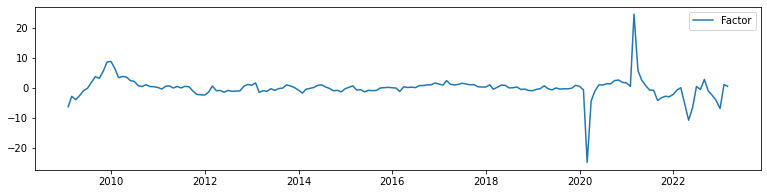

In [169]:
fig, ax = plt.subplots(figsize=(13,3))

# Plot the factor
dates = endog.index._mpl_repr()
ax.plot(dates, res.factors.filtered['0'], label='Factor')
ax.legend()
 

In [22]:
a = pd.read_excel(r'C:\Users\Dongshuo ZHANG\Downloads\fil.xlsx',index_col = 0)
a 

,0
2009-01-31,-10.159115
2009-02-28,-5.761034
2009-03-31,-6.559227
2009-04-30,-5.338106
2009-05-31,-1.249419
...,...
2022-09-30,-1.097653
2022-10-31,-1.800473
2022-11-30,-3.379269
2022-12-31,-5.582871


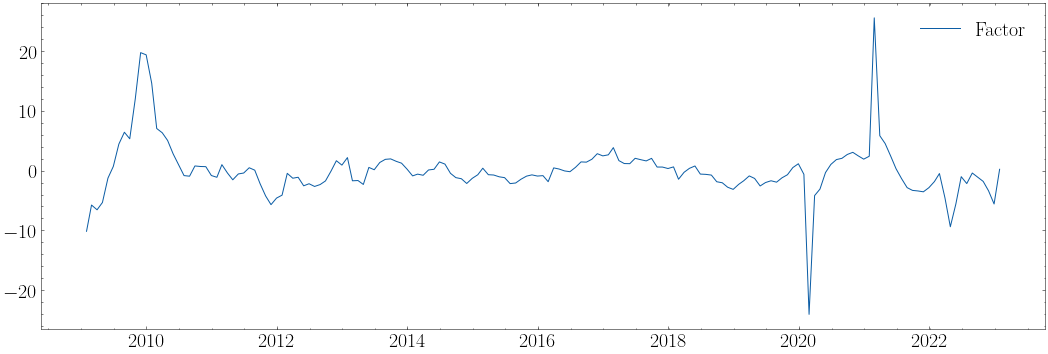

In [23]:

plt.style.use('science')
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (20,8) 
plt.rcParams['font.size'] =  20.0
plt.rcParams['font.weight'] = 'bold'

fig, ax = plt.subplots(  figsize=(18, 6))

ax.plot(a.index, a['0'], label='Factor')

ax.legend()
plt.show()

In [38]:
a = pd.read_excel(r'C:\Users\Dongshuo ZHANG\Downloads\fil (1).xlsx',index_col = 0)
a = a*100 
a =a.iloc[67:]

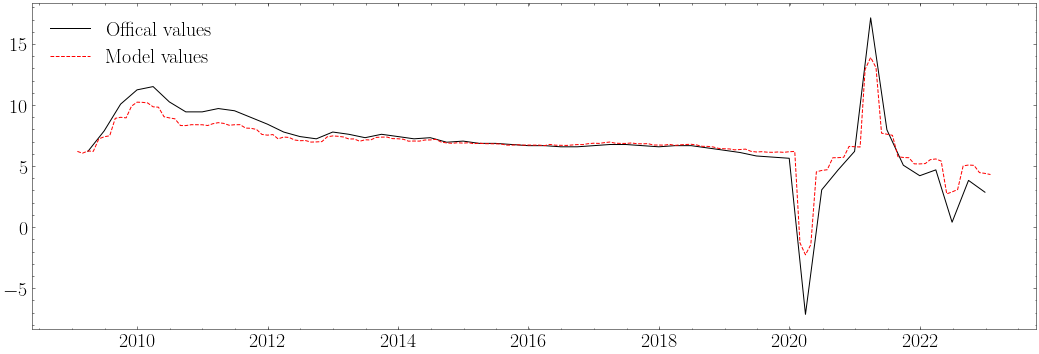

In [50]:
fig, ax = plt.subplots(  figsize=(18, 6))

ax.plot(a.dropna().index, a.dropna().iloc[:,0],  'k-', label='Offical values')
ax.plot(a.index,a.iloc[:,1], 'r--', label='Model values')
ax.legend()
plt.show()

In [64]:
ALL_MACRO_DATA_PRED1 = pd.read_excel(r'C:\Users\Dongshuo ZHANG\Downloads\ALL_MACRO_DATA_PRED1.xlsx',index_col = 0)
ALL_MACRO_DATA_PRED1.loc['2010-01-18', 'YOY'] = 0.11
ALL_MACRO_DATA_PRED1.loc['2010-01-31', 'YOY'] = 0.102
ALL_MACRO_DATA_PRED1

,YOY
2009-01-01,0.181324
2009-01-07,0.189545
2009-01-12,0.205016
2009-01-18,0.224019
2009-01-31,0.117877
...,...
2023-01-01,0.040102
2023-01-07,0.040079
2023-01-12,0.040078
2023-01-18,0.040063


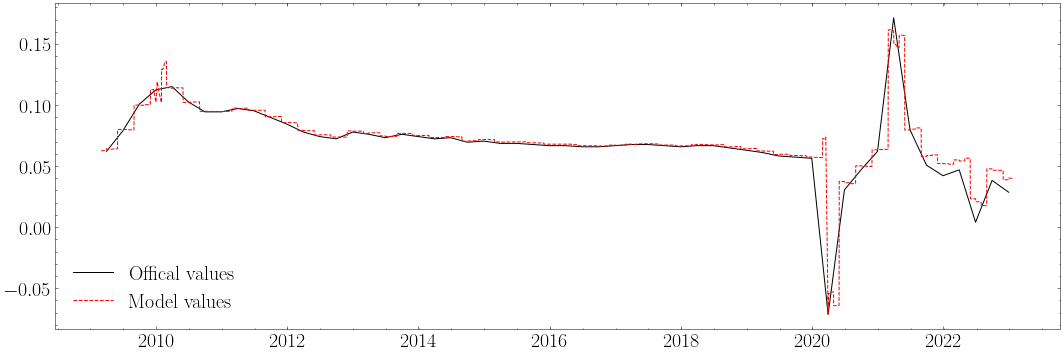

In [65]:
fig, ax = plt.subplots(  figsize=(18, 6))

ax.plot(GDP_YOY['2009':].index,GDP_YOY['2009':]['YOY'],  'k-', label='Offical values')
ax.plot(ALL_MACRO_DATA_PRED1['2009-03':].index ,ALL_MACRO_DATA_PRED1['2009-03':]['YOY'], 'r--', label='Model values')
ax.legend()
plt.show()

KeyError: '2010-01-18'

Index(['全国国有企业:营业总收入:累计值', '全国国有企业:利润总额:累计值', '固定资产投资完成额:累计值',
       '房地产开发投资完成额:累计值', '社会消费品零售总额:累计值', '公共财政收入:累计值', '公共财政支出:累计值',
       '城镇新增就业人数:累计值', '产量:原煤:累计值', '产量:铁矿石原矿量:累计值', '土地购置费:累计值', '房屋施工面积:累计值',
       '房屋竣工面积:累计值', '商品房销售面积:累计值'],
      dtype='object')

In [251]:
ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据缺失月份'] == 1].index]['2018']

,全国国有企业:营业总收入:累计值,全国国有企业:利润总额:累计值,固定资产投资完成额:累计值,房地产开发投资完成额:累计值,社会消费品零售总额:累计值,公共财政收入:累计值,公共财政支出:累计值,产量:原煤:累计值,产量:铁矿石原矿量:累计值,土地购置费:累计值,房屋施工面积:累计值,房屋竣工面积:累计值,商品房销售面积:累计值
2018-01-31,0.137372,0.196188,0.075570,0.094509,0.052466,0.139770,0.389954,0.018582,-0.399847,0.391361,0.014425,-0.129208,0.040323
2018-02-28,0.137372,0.196188,0.075570,0.094509,0.052466,0.139770,0.389954,0.018582,-0.399847,0.391361,0.014425,-0.129208,0.040323
2018-03-31,0.056115,0.185848,0.068904,0.102878,0.046625,0.080363,0.040835,-0.048054,-0.546852,0.617916,0.036899,-0.054490,0.031232
2018-04-30,0.140976,0.215194,0.058497,0.097143,0.045274,0.095867,0.074867,-0.023285,-0.449292,0.501392,0.044538,-0.146548,-0.041799
2018-05-31,0.141941,0.290497,0.037891,0.093364,0.030090,0.092501,0.005184,0.011087,-0.485103,0.562048,0.168794,-0.073097,0.076853
2018-06-30,0.121834,0.145533,0.055483,0.080788,0.034098,0.034400,0.067308,-0.025805,-0.648637,0.629997,0.165952,-0.135675,0.044023
2018-07-31,0.041508,0.188091,0.029101,0.123598,0.037254,0.059230,0.032681,-0.041183,-0.665986,0.482674,0.234309,-0.107606,0.094388
2018-08-31,0.127812,0.109088,0.045130,0.088473,0.039202,0.039065,0.032887,0.021330,-0.569918,0.341930,0.275937,-0.236814,0.023985
2018-09-30,0.111938,0.024853,0.059680,0.085526,0.036113,0.019408,0.110680,0.080400,-0.480811,0.476079,0.183281,-0.096266,-0.036609
2018-10-31,0.106060,0.086794,0.077554,0.073961,0.037077,-0.031733,0.078565,0.153280,-0.537757,0.376744,0.187199,-0.235061,-0.031634


,工业增加值:当月同比,全国国有企业:营业总收入:累计值,全国国有企业:利润总额:累计值,CPI:当月同比,RPI:当月同比,PPI:全部工业品:当月同比,进出口金额:当月值,贸易差额:当月值,实际使用外资金额:外商直接投资:当月值,固定资产投资完成额:累计值,...,产量:原煤:累计值,进口数量:原油:当月值,产量:铁矿石原矿量:累计值,进口数量:铁矿石:合计:当月值,土地购置费:累计值,房屋施工面积:累计值,房屋竣工面积:累计值,商品房销售面积:累计值,产量:乘用车:广义:当月值,零售销量:乘用车:广义:当月值
1991-01-31,0.211071,NaN,NaN,0.021761,0.013903,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.088011,NaN,NaN,0.009950,0.009950,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.103459,NaN,NaN,0.015873,0.008960,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.103459,NaN,NaN,0.012916,0.005982,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.103459,NaN,NaN,0.035367,0.030529,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,0.048790,-0.869808,1.826636,0.020783,0.022739,-0.013085,5113.40,849.40,130.4,0.474076,...,-2.154275,4314.0,NaN,9489.505594,0.800479,0.220259,-0.842701,0.079737,2315675.0,1866180.0
2022-11-30,0.021761,NaN,0.926065,0.015873,0.017840,-0.013085,5213.47,690.56,97.4,-5.087644,...,0.253990,4674.0,-1.474326,9883.512643,0.225162,0.966797,NaN,0.988509,2136171.0,1673515.0
2022-12-31,0.012916,0.828269,NaN,0.017840,0.019803,-0.007025,5341.45,780.13,110.5,-3.406504,...,-2.069243,4807.0,NaN,9085.858265,NaN,0.412159,NaN,0.800613,2144903.0,2192309.0
2023-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,inf,inf,NaN,NaN


In [230]:
ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据缺失月份'] == 1].index] = np.log(ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据缺失月份'] == 1].index] / ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据缺失月份'] == 1].index].shift(12))
ALL_MACRO_DATA_M

KeyError: Timestamp('2023-03-31 00:00:00')

False

Timestamp('2023-03-31 00:00:00')

In [175]:

mask = ALL_MACRO_DATA_M.index.month == 3
ALL_MACRO_DATA_M[ALL_MACRO_DATA_DICT[ALL_MACRO_DATA_DICT['数据缺失月份'] == 1].index].loc[mask, :] 

1991-01-31          NaN
1991-02-28          NaN
1991-03-31          NaN
1991-04-30          NaN
1991-05-31          NaN
                ...    
2022-10-31    111179.29
2022-11-30    121250.08
2022-12-31    135836.89
2023-01-31          NaN
2023-02-28          NaN
Name: 商品房销售面积:累计值, Length: 386, dtype: float64